In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

## rc

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)


## Cluster Summary

In [3]:
cell_tidy_data = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'MajorRegion', 'SubRegion', 'CellClass', 'l1-umap_0', 'l1-umap_1',
       'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1',
       'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1',
       'l3-tsne_0', 'l3-tsne_1'],
      dtype='object')

In [5]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,MajorType,l2-umap_0,l2-umap_1,l2-tsne_0,l2-tsne_1,SubType,l3-umap_0,l3-umap_1,l3-tsne_0,l3-tsne_1
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,MGE-Sst,-23.368460,-1.151200,-34.021153,-19.429447,MGE-Sst Rxra,-0.766630,-16.704815,20.297781,1.192093
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,CA3,-8.322600,-3.988057,19.205085,10.272570,CA3 Cadm2,4.290240,-2.610511,7.860870,8.813396
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,CA3,-7.409779,-4.662556,20.146606,6.345836,CA3 Cadm2,5.852028,-2.510058,12.927795,8.544050
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,CA3,-6.266342,-8.345406,25.465765,-6.767192,CA3 Cadm2,11.189178,-3.763147,29.875836,2.739283
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,CA1,-1.135772,-17.311239,-7.427455,-20.497435,CA1 Chrm3,2.912797,2.683262,-19.971042,24.551260


## Palette

In [6]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()



In [7]:
type_order = pd.read_csv('./files/MajorType.order_by_dendrogram.txt', index_col=0, header=None).index.tolist()

## Calc Cluster Region Entropy

In [8]:
from scipy.stats import entropy
def calc_entropy(sub_df, col):
    counts = sub_df[col].value_counts().tolist()
    return entropy(counts)

cluster_col = 'MajorType'
region_col = ['MajorRegion', 'SubRegion', 'Region']

bar_data = {}
for col in region_col:
    region_type_entropy = cell_tidy_data.groupby(cluster_col).apply(lambda i: calc_entropy(i, col=col))
    bar_data[col] = region_type_entropy
bar_data = pd.DataFrame(bar_data)
bar_data = bar_data.unstack().reset_index()
bar_data.columns = ['RegionType', 'Cluster', 'Entropy']

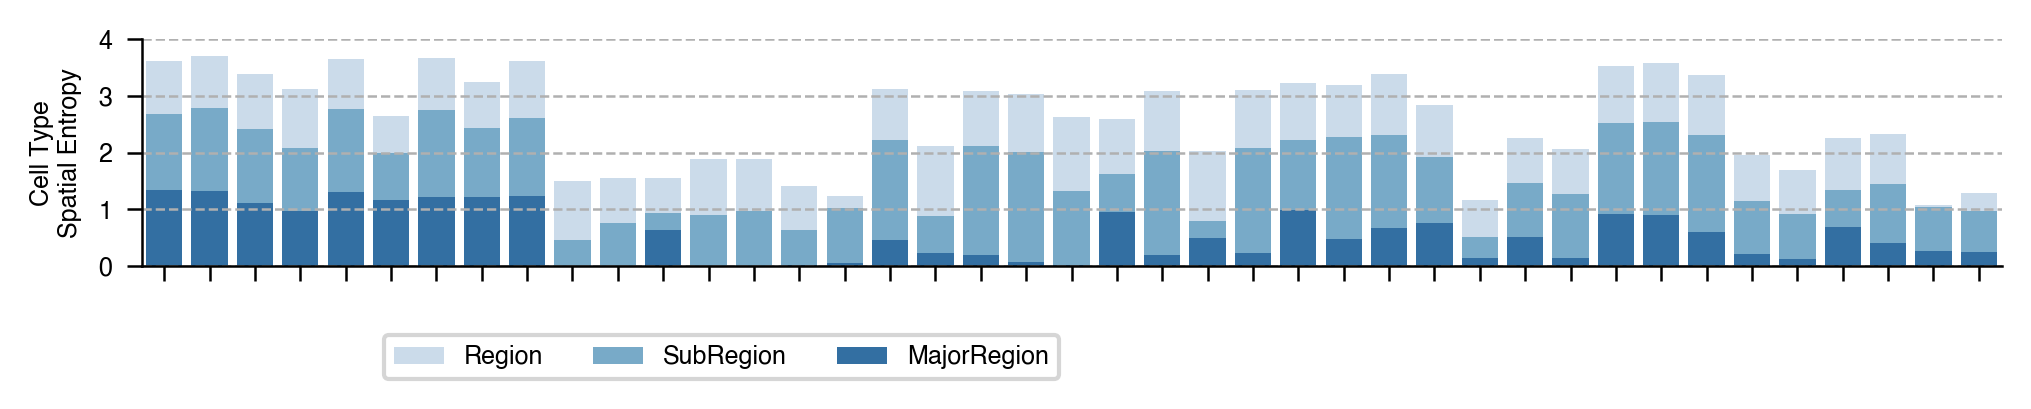

In [9]:
fig, ax = plt.subplots(figsize=(8, 1), dpi=300)

sns.barplot(data=bar_data,
            ax=ax,
            x='Cluster',
            y='Entropy',
            order=type_order,
            hue='RegionType',
            hue_order=region_col[::-1],
            palette='Blues',
            dodge=False)

ax.set(xticklabels=[], yticks=[0, 1, 2, 3, 4], xlabel='', ylabel='Cell Type\nSpatial Entropy')
ax.grid(axis='y', linewidth=linewidth, linestyle='--')
ax.legend(bbox_to_anchor=(0.5, -.25), ncol=3, fontsize=labelsize)
sns.despine(ax=ax)

fig.savefig('files/cell_type_spatial_entropy_barplot.pdf', bbox_inches='tight')

## Calc Region Cluster Entropy

In [19]:
region_col = 'SubRegion'
cluster_col = ['CellClass', 'MajorType', 'SubType']

bar_data = {}
for col in cluster_col:
    region_type_entropy = cell_tidy_data.groupby(region_col).apply(lambda i: calc_entropy(i, col=col))
    bar_data[col] = region_type_entropy
bar_data = pd.DataFrame(bar_data)
bar_data = bar_data.unstack().reset_index()
bar_data.columns = ['ClusterType', 'Region', 'Entropy']

In [20]:
region_order = [
    '3F', '4E', '5F', '4D', '5E', '4G', '5J', '4H', '5H', '8E', '9H', '10E',
    '10F', '11E', '8J', '9J', '11F', '5A', '6A', '2A', '3A', '4A', '3D', '2C',
    '3C', '4B', '5D', '1A', '2B', '3B', '1B', '4C', '5B', '6B', '7B', '8B',
    '5C', '6C', '2E', '1C', '2D', '3E', '4F', '5G', '6D'
]

region_order = [
    'ACB', 'CP', 'LSX', 'PAL', 'CA', 'CA,DG', 'DG', 'ACA', 'ACA,PL,ILA', 'AI',
    'MOp', 'MOs', 'ORB', 'SSp', 'SSs', 'AON', 'MOB,AON', 'PIR'
]

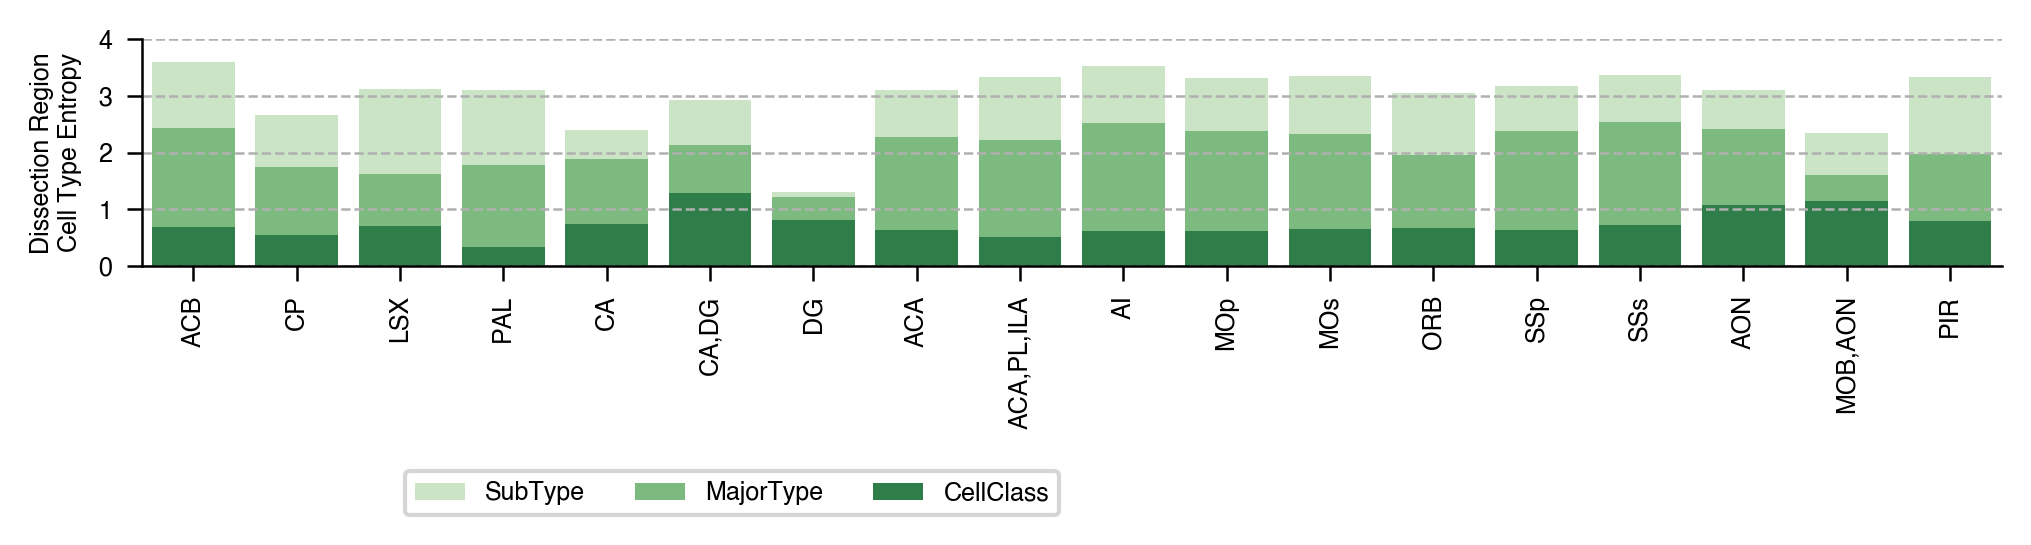

In [22]:
fig, ax = plt.subplots(figsize=(8, 1), dpi=300)

sns.barplot(data=bar_data,
            ax=ax,
            x='Region',
            y='Entropy',
            order=region_order,
            hue='ClusterType',
            hue_order=cluster_col[::-1],
            palette='Greens',
            dodge=False)

ax.set(xticklabels=region_order, yticks=[0, 1, 2, 3, 4], 
       xlabel='', ylabel='Dissection Region\nCell Type Entropy')
ax.xaxis.set_tick_params(rotation=90)
ax.grid(axis='y', linewidth=linewidth, linestyle='--')
ax.legend(bbox_to_anchor=(0.5, -.85), ncol=3, fontsize=labelsize)
sns.despine(ax=ax)

fig.savefig('files/region_cell_type_entropy_barplot.pdf', bbox_inches='tight')